In [2]:
import pandas as pd
from matplotlib import pyplot as plt

import model


In [3]:
data=pd.read_csv("C:/Users/sknav/Downloads/FOA PROJECT/pokemons.csv")

In [4]:
def dataclean():
    data["height_m"].fillna(value='unknown ',inplace=True)
    data["percentage_male"].fillna(value=-1,inplace=True)
    data["type2"].fillna(value="null",inplace=True)
    data["weight_kg"].fillna(value='unknown',inplace=True)

In [5]:
dataclean()

In [6]:
def typeclassification():
    x=pd.unique(data['type1'])
    amount=[]
    for i in x:
        ctr = 0;
        for j in data['type1']:    
            if i==j:
                ctr+=1
        for k in data['type2']:
            if i==k:
                ctr+=1
        amount.append(ctr)

    colorcode=['green','red','blue','chartreuse','grey','blueviolet','yellow','goldenrod','deeppink','firebrick','magenta','tan','indigo','aquamarine','royalblue','black','slategrey','lightskyblue']
    plt.bar(x,amount, color=colorcode)
    plt.xlabel('Pokemon type')
    plt.ylabel('Number of pokemon')
    plt.xticks(rotation=90)
    for i in range(len(amount)):
        plt.annotate(str(amount[i]), xy=(x[i],amount[i]), ha='center', va='bottom')
    plt.show()

In [7]:
def predictor():
    nom=int(input('Enter the First pokedex number'))
    nom1=int(input('Enter the Second pokedex number'))
    model.prediction(nom,nom1)

In [8]:
def genclassification():
    x=pd.unique(data['generation'])
    count=[]
    for i in x:
        ctr = 0
        for j in data['generation']:    
            if i==j:
                ctr+=1
        count.append(ctr)
    plt.bar(x,count)
    for i in range(len(count)):
        plt.annotate(str(count[i]), xy=(x[i],count[i]), ha='center', va='baseline')
    plt.xlabel('GENERATIONS')
    plt.ylabel('Number of pokemon')
    plt.show()

In [9]:
def legendpergen():
    x=pd.unique(data['generation'])
    count=[]
    new=[]
    for i in x:
        ctr=0
        subdata=data[data['generation']==i]
        for j in subdata['is_legendary']:
            if j==1:
                ctr+=1
        count.append(ctr)
    for i in x:
        new.append('gen'+str(i))
    plt.pie(count, labels=new,autopct='%1.0f%%',shadow=True)
    plt.title('Legendary pokemon distribution')
    plt.show()


In [10]:
def battle_advisor(pok):
    types=['Normal', 'Fire', 'Water', 'Electric', 'Grass', 'Ice', 'Fighting', 'Poison', 'Ground','Flying', 'Psychic', 'Bug', 'Rock', 'Ghost', 'Dragon', 'Dark', 'Steel', 'Fairy']    
    print('Hello Trainer!')
    print("Seems like you have problems facing {}. Let me help you find your opponent's weaknesses:".format(pok))
    print()
    print()
    if pok in list(data['name']):
        print('**** SUPER-EFFECTIVE ATTACK TYPES ****')
        opponent = data.loc[data['name']==pok]
        for t in types: 
            if opponent.iloc[0][t]==4:
                print('{} attacks are x4 times super-effective on {}!'.format(t.upper(),opponent.iloc[0]['name'])) #uppercasing the attack type to make it eye-catching
                print()
            elif opponent.iloc[0][t]==2:
                print('{} attacks are x2 times super-effective on {}'.format(t.upper(),opponent.iloc[0]['name']))
                print()
                
        print()
        print("On the other hand, I recommend you NOT to choose a not very effective attack type.")
        print("**** NOT-SO-EFFECTIVE ATTACK TYPES ****")
        for t in types:
            if opponent.iloc[0][t]==0.5:
                print('{} attacks are not very effective on {}'.format(t.upper(),opponent.iloc[0]['name']))
                print()
            elif opponent.iloc[0][t]==0:
                print('{} attacks are NOT EFFECTIVE at all on {}'.format(t.upper(),opponent.iloc[0]['name']))
                print()
                
    else:
        print('OOPS! I do not have this Pokemon in my Database, you have to cope with this on your own')
    return

In [11]:
def pokedex(pok):
    print('############################ You are using the Pokedex ############################')
    subdata=data[data['name']==pok]
    while True:
        ent=int(input('''\n Use the following Numbers to get desired information:
                        1. Abilities
                        2. pokedex number
                        3. steps required to hatch
                        4. capture rate
                        5. classification
                        6. Legendary?
                        7. Exit to RotomDex
                        use battle advisor to see type matchups  
enter your choice: '''))
        if ent==1:
            for i in subdata['abilities']:
                print('The pokemon has the following abilities: ',i)
        elif ent==2:
            for i in subdata['pokedex_number']:
                print('The pokedex number is: ',i)
        elif ent==3:
            for i in subdata['base_egg_steps']: 
                print("Number of steps required to hatch the egg: ",i)
        elif ent==4:
            for i in subdata['capture_rate']:
                print('Capture rate of the pokemon is: ',i)
        elif ent==5:
            for i in subdata['classfication']:
                print("the pokemon is classified as: ",i)
        elif ent==6:
            for i in subdata['is_legendary']:
                if (i==1):
                    print("The pokemon is legendary :D")
                else:
                    print("The pokemon is not a legendary :(")
        elif ent==7:
            break
        else:
            print('enter a valid number')




############################ Welcome to Rotomdex ############################

 Use the following Numbers to use the desired function:
                    1. Number of pokemon of each type
                    2. Number of pokemon in each generation
                    3. Legendary pokemon distribution
                    4. Predict pokemon fight
                    5. Battle advisor
                    6. Pokedex
                    7. Exit
  
enter your choice: 1


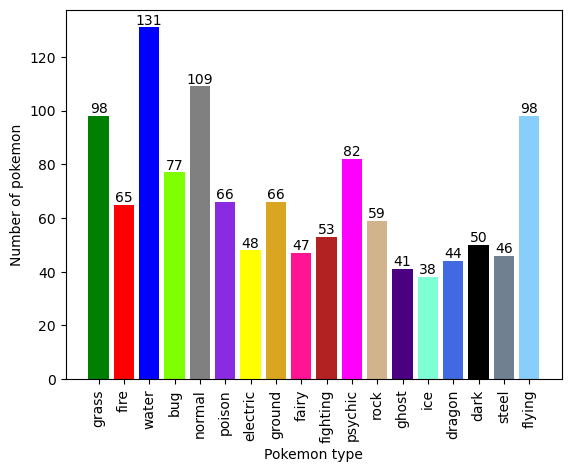


 Use the following Numbers to use the desired function:
                    1. Number of pokemon of each type
                    2. Number of pokemon in each generation
                    3. Legendary pokemon distribution
                    4. Predict pokemon fight
                    5. Battle advisor
                    6. Pokedex
                    7. Exit
  
enter your choice: 2


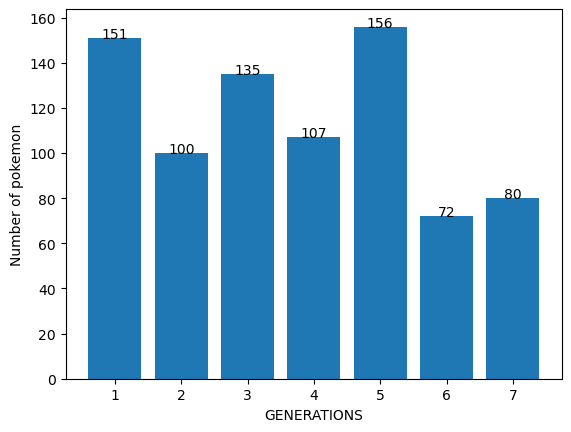


 Use the following Numbers to use the desired function:
                    1. Number of pokemon of each type
                    2. Number of pokemon in each generation
                    3. Legendary pokemon distribution
                    4. Predict pokemon fight
                    5. Battle advisor
                    6. Pokedex
                    7. Exit
  
enter your choice: 3


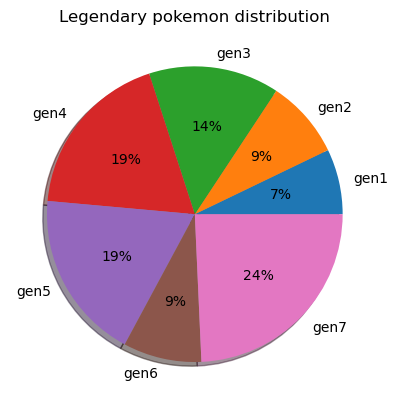

In [ ]:
# main loop to keep the program running till exited by user
print('############################ Welcome to Rotomdex ############################')
while True:
    ent=int(input('''\n Use the following Numbers to use the desired function:
                    1. Number of pokemon of each type
                    2. Number of pokemon in each generation
                    3. Legendary pokemon distribution
                    4. Predict pokemon fight
                    5. Battle advisor
                    6. Pokedex
                    7. Exit
  
enter your choice: '''))

    if ent==1:
        typeclassification()
    elif ent==2:
        genclassification()
    elif ent==3:
        legendpergen()
    elif ent==4:
        predictor()
    elif ent==5:
        pok=input('enter pokemon\'s name: ')
        battle_advisor(pok)
    elif ent==6:
        pok=input('enter pokemon\'s name: ').title()
        pokedex(pok)
    elif ent==7:
        print('Thank You for using RotomDex')
        break
    else:
        print('enter a valid number!!!')